# Análise de dados de E-commerce


### Objetivo: Obter insights e buscar padrões.

Fonte dos dados: https://www.kaggle.com/olistbr/brazilian-ecommerce

O dataset contém informações de 100 mil pedidos de 2016 a 2018 feitos em diversos mercados no Brasil.

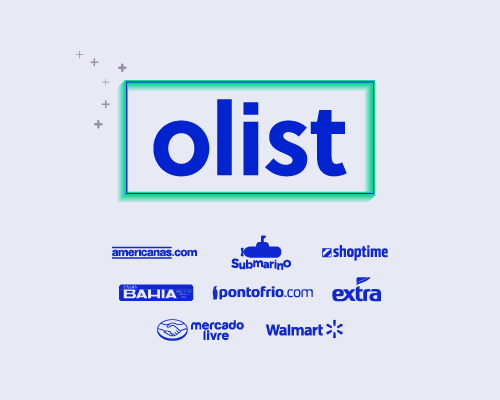

In [1]:
from IPython.display import Image
Image("olist.png")

In [2]:
# Pacotes.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importando os dados.
customers = pd.read_csv("olist_customers_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
product_category_name = pd.read_csv("product_category_name_translation.csv")

In [4]:
# Merge
df = orders.copy()
df = df.merge(customers,on='customer_id',indicator = True)
df = df.merge(order_reviews,on='order_id')
df = df.merge(order_payments,on='order_id')
df = df.merge(order_items,on='order_id')
df = df.merge(products,on='product_id')
df = df.merge(sellers,on='seller_id')
df = df.merge(product_category_name)
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares


## Total de vendas por UF

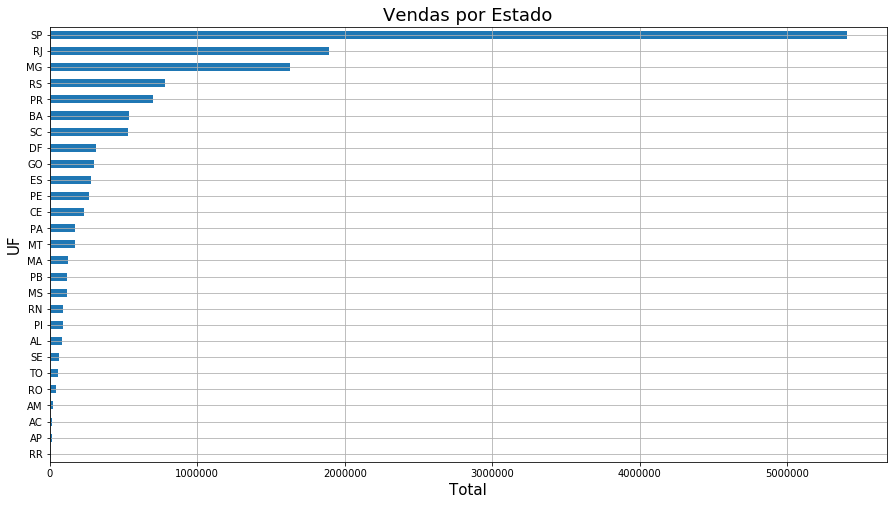

In [5]:
# plot.
states = df.groupby(['customer_state']).sum()
states['price'].sort_values(ascending = True).plot(kind = "barh", figsize=(15,8))
plt.title("Vendas por Estado", fontsize = 18)
plt.xlabel("Total", fontsize = 15)
plt.ylabel("UF", fontsize = 15)
plt.grid()
plt.show()

## Formas de pagamentos realizadas

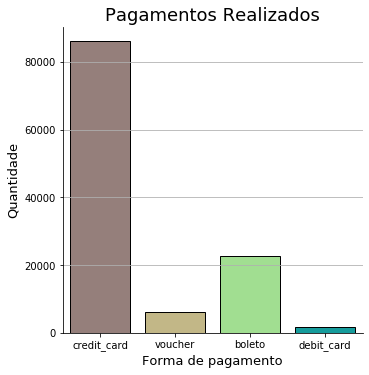

In [6]:
# plot.
sns.catplot(x = "payment_type", kind = "count", palette = "terrain_r", edgecolor='black', data = df)
plt.title("Pagamentos Realizados", fontsize = 18)
plt.xlabel("Forma de pagamento", fontsize = 13)
plt.ylabel("Quantidade", fontsize = 13)
plt.rc("grid", linestyle = "-", color = "black")
plt.grid(axis='y')
plt.show()

## Status dos pedidos

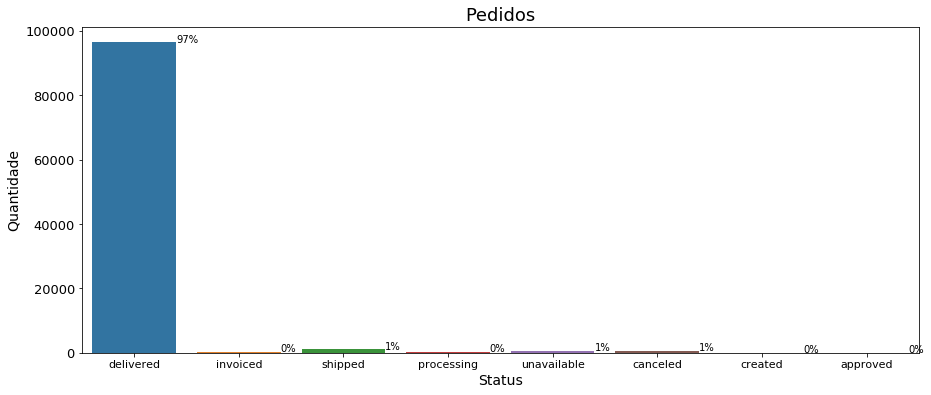

In [7]:
# Plot.
plt.figure(figsize = (15,6))
total = float(len(orders["order_status"]))
ax = sns.countplot(x="order_status", data= orders)
plt.title("Pedidos", fontsize = 18)
plt.xlabel("Status", fontsize = 14)
plt.xticks(size = 11)
plt.ylabel("Quantidade", fontsize = 14)
plt.yticks(size = 13)
for i in ax.patches:
    percentage = '{:.0f}%'.format(100 * i.get_height()/total)
    x = i.get_x() + i.get_width()
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha = "left")
plt.show()

## Custo médio de frete por cidade

In [313]:
round(df.groupby("seller_city")["freight_value"].mean().sort_values(ascending = True).head(), 2)

seller_city
jacarei / sao paulo         8.60
sao paulo / sao paulo       9.17
brotas                      9.51
sao pauo                    9.56
carapicuiba / sao paulo    11.10
Name: freight_value, dtype: float64

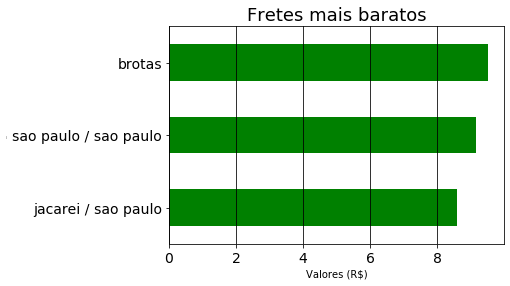

In [322]:
# Frete
round(df.groupby("seller_city")["freight_value"].mean().sort_values(ascending = True).head(3), 2).plot.barh(color = "g")
plt.title("Fretes mais baratos", fontsize = 18)
plt.xlabel("Valores (R$)", fontsize = 10)
plt.xticks(fontsize = 14)
plt.ylabel("Cidades", fontsize = 0)
plt.yticks(fontsize = 14)
plt.grid(axis = "x")

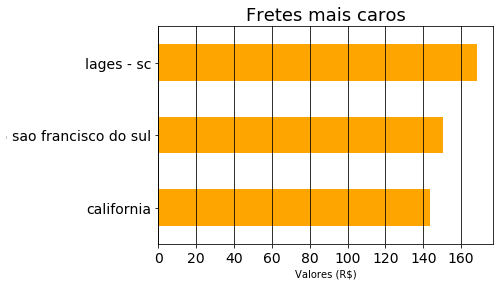

In [325]:
# Frete
round(df.groupby("seller_city")["freight_value"].mean().sort_values(ascending = True).tail(3), 2).plot.barh(color = "orange")
plt.title("Fretes mais caros", fontsize = 18)
plt.xlabel("Valores (R$)", fontsize = 10)
plt.xticks(fontsize = 14)
plt.ylabel("Cidades", fontsize = 0)
plt.yticks(fontsize = 14)
plt.grid(axis = "x")

## Custo médio de frete por UF

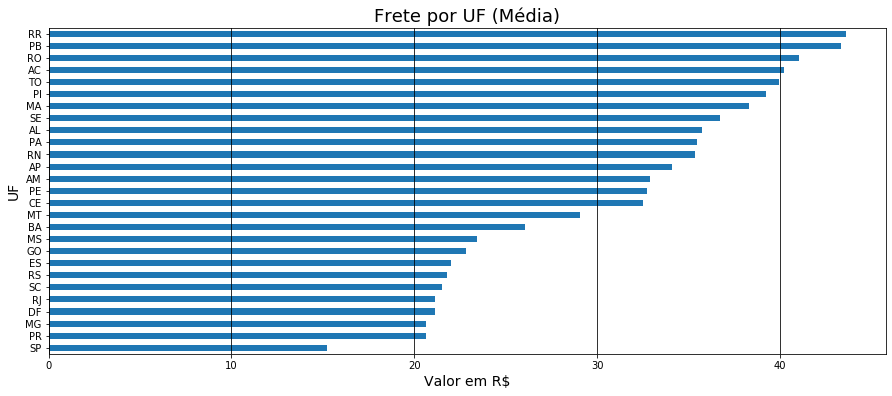

In [10]:
# Plot.
plt.figure(figsize = (15,6))
df.groupby("customer_state")["freight_value"].mean().sort_values(ascending = True).plot.barh()
plt.title("Frete por UF (Média)", fontsize = 18)
plt.xlabel("Valor em R$", fontsize = 14)
plt.ylabel("UF", fontsize = 14)
plt.grid(axis='x')
plt.show()

O Norte e Nordeste do país lideram os fretes mais caros, seguidos pelo Centro-Oeste, Sul e Sudeste.

In [11]:
# Obtendo algumas colunas.
df2 = df[["order_purchase_timestamp", "order_estimated_delivery_date", "order_delivered_customer_date", "customer_state"]]
df2.head()

,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,customer_state
0,2017-10-02 10:56:33,2017-10-18 00:00:00,2017-10-10 21:25:13,SP
1,2017-10-02 10:56:33,2017-10-18 00:00:00,2017-10-10 21:25:13,SP
2,2017-10-02 10:56:33,2017-10-18 00:00:00,2017-10-10 21:25:13,SP
3,2017-08-15 18:29:31,2017-08-28 00:00:00,2017-08-18 14:44:43,SP
4,2017-08-02 18:24:47,2017-08-15 00:00:00,2017-08-07 18:30:01,SP


In [12]:
# Verificando valores missing.
df2.isnull().sum()

order_purchase_timestamp            0
order_estimated_delivery_date       0
order_delivered_customer_date    2515
customer_state                      0
dtype: int64

In [13]:
# No primeiro momento faremos a remoção dos valores missing.
df2.dropna(inplace=True)

In [14]:
# Transformando as variáveis em datetime.
df2["purchase"] = pd.to_datetime(df["order_purchase_timestamp"])
df2["estimated"] = pd.to_datetime(df["order_estimated_delivery_date"])
df2["delivered"] = pd.to_datetime(df["order_delivered_customer_date"])

In [15]:
# Calculando as diferenças entre a entrega e a data de compra (em dias).
df2["days_purch"] = (df2["delivered"] - df2["purchase"]).dt.days

# Calculando as diferenças entre a data estimada de entrega e a data de compra (em dias).
df2["days_est"] = (df2["estimated"] - df2["purchase"]).dt.days
df2.head()

,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,customer_state,purchase,estimated,delivered,days_purch,days_est
0,2017-10-02 10:56:33,2017-10-18 00:00:00,2017-10-10 21:25:13,SP,2017-10-02 10:56:33,2017-10-18,2017-10-10 21:25:13,8,15
1,2017-10-02 10:56:33,2017-10-18 00:00:00,2017-10-10 21:25:13,SP,2017-10-02 10:56:33,2017-10-18,2017-10-10 21:25:13,8,15
2,2017-10-02 10:56:33,2017-10-18 00:00:00,2017-10-10 21:25:13,SP,2017-10-02 10:56:33,2017-10-18,2017-10-10 21:25:13,8,15
3,2017-08-15 18:29:31,2017-08-28 00:00:00,2017-08-18 14:44:43,SP,2017-08-15 18:29:31,2017-08-28,2017-08-18 14:44:43,2,12
4,2017-08-02 18:24:47,2017-08-15 00:00:00,2017-08-07 18:30:01,SP,2017-08-02 18:24:47,2017-08-15,2017-08-07 18:30:01,5,12


## Tempo previsto de entrega

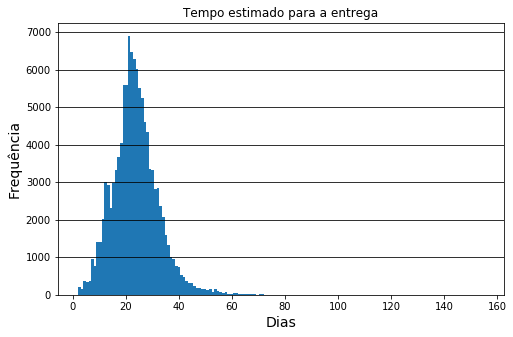

In [16]:
# Plot
df2["days_est"].plot.hist(bins = df2["days_est"].max(), figsize = (8,5))
plt.title('Tempo estimado para a entrega')
plt.xlabel('Dias', fontsize = 14)
plt.ylabel('Frequência', fontsize = 14)
plt.grid(axis='y')

## Tempo real de entrega

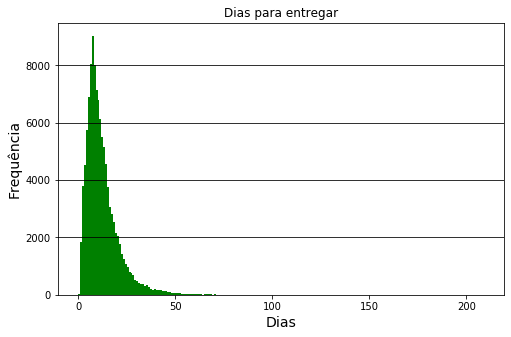

In [104]:
# Plot
df2["days_purch"].plot.hist(bins = df2["days_purch"].max(), color = "g", figsize = (8,5))
plt.title('Dias para entregar')
plt.xlabel('Dias', fontsize = 14)
plt.ylabel('Frequência', fontsize = 14)
plt.grid(axis='y')

Como mostra acima, a entrega, na maioria dos casos é feita antes do prazo estimado.

In [18]:
# Criando a variável para analisar os atrasos.
df2["delayed"] = (df2["estimated"] - df2["delivered"]).dt.days

# Obtendo os valores negativos que representam os atrasos.
df2_count_delay = df2[df2["delayed"] < 0].groupby(["customer_state"], as_index=False)["delayed"].count()

# Agrupando a UF nos dados.
df2_total = df2.groupby(df2["customer_state"], as_index = False)["delayed"].count()

In [228]:
# Unindo as informações.
df2_total = df2_count_delay.merge(df2_total, on = "customer_state")
df2_total.rename(columns = {"delayed_y" : "total_orders"}, inplace = True)

In [294]:
# Adicionando a variável com a % de atrasos.
df2_total["%"] = round((df2_total["delayed_x"] / df2_total["total_orders"]) * 100, 2)
df2_total.sort_values(by = "%", ascending = False)

# Selecionando vendas maiores ou iguais a 2000 e menores que 6500..
df3 = df2_total.query("total_orders >= 2000 and total_orders < 6500").sort_values(by = "%", ascending = False)

# Obtendo algumas colunas e renomeando.
vendas = df3[["customer_state", "total_orders"]]
vendas.rename(columns = {"customer_state": "UF", "total_orders": "Orders"}, inplace = True)

# Colocando a coluna das UFs como índice.
df3.set_index("customer_state", inplace = True)
df3.head()

,delayed,delayed_x,total_orders,%
customer_state,,,,
BA,537,537,3878,13.85
ES,277,277,2299,12.05
SC,394,394,4178,9.43
GO,178,178,2340,7.61
DF,178,178,2415,7.37


In [269]:
# Instanciando as maiores e menores ocorrências de atraso.
delay_max = df3["%"].sort_values(ascending = True)[0:4]
delay_min = df3["%"].sort_values(ascending = True)[4:]

In [ ]:
# Instanciando as maiores e menores ocorrências de atraso.
delay_max = df2_total["%"].sort_values(ascending = True)[0:5]
delay_min = df2_total["%"].sort_values(ascending = True)[0:5]

## Atrasos por UF (Entre 2.000 - 6.500 vendas)

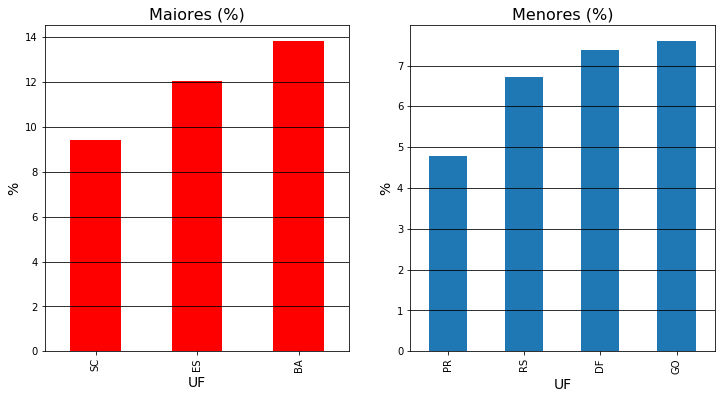

    UF  Orders
4   BA    3878
7   ES    2299
23  SC    4178
8   GO    2340
6   DF    2415
22  RS    6333
17  PR    5816


In [271]:
# Plot 1
plt.subplot(1, 2, 1)
ax2 = delay_min.plot.bar((), figsize = (12,6), color = "r")
plt.title('Maiores (%)', fontsize = 16)
plt.xlabel('UF', fontsize = 14)
plt.ylabel('%', fontsize = 14)
plt.grid(axis='y')

# Plot 2
plt.subplot(1, 2, 2)
ax = delay_max.plot.bar((), figsize = (12,6))
plt.title('Menores (%)', fontsize = 16)
plt.xlabel('UF', fontsize = 14)
plt.ylabel('%', fontsize = 14)
plt.grid(axis='y')
  
plt.show()

# Total de vendas
print(vendas)

Dentro da condição que foi colocada (**Vendas superiores a 2000 mil e inferiores a 6500**). O estado da **Bahia e Espírito Santo**, ocorrem os maiores índices de atraso.
No gráfico ao lado, o estado com a menor taxa de atraso é o **Paraná**.

In [25]:
# Merge.
product_orders=pd.merge(order_items,products, on="product_id")

In [26]:
# Obtendo somente os 6 últimos caractétes de cada produto para uma análise.
product_orders['product_id_shorten']=product_orders['product_id'].str[-6:]

## Top 10 Produtos vendidos

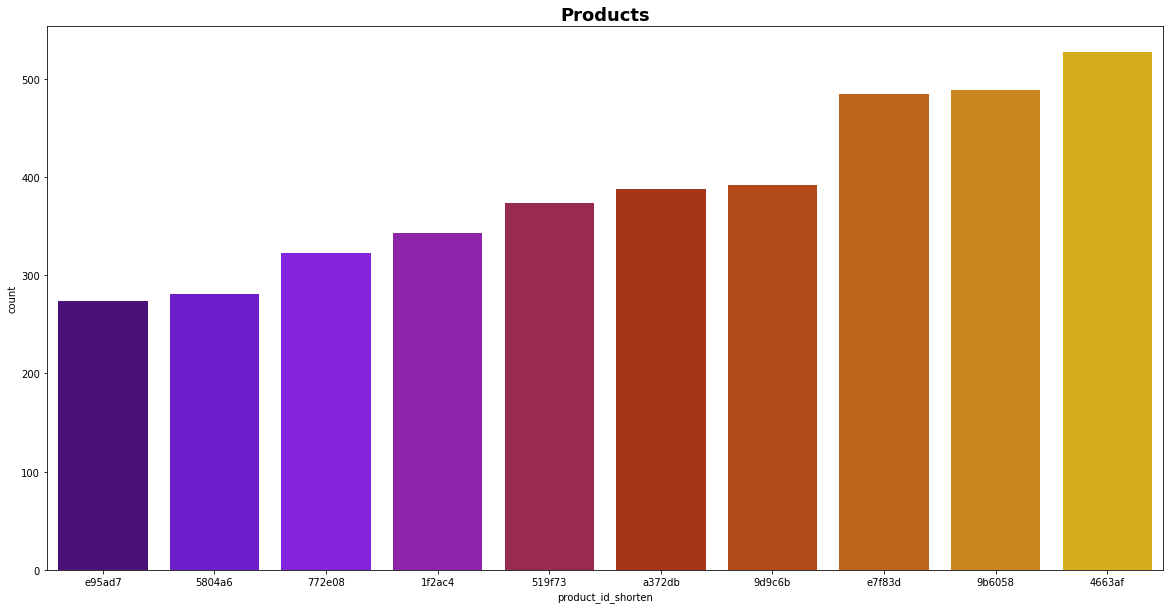

In [27]:
# Plot.

plt.figure(figsize=(20,10))
sns.countplot(x='product_id_shorten', data=product_orders, palette='gnuplot',
             order=product_orders['product_id_shorten'].value_counts()[:10]\
             .sort_values().index).set_title("Products", fontsize=18, weight='bold')
plt.show()

Pelas informações dos dados, não será possível dizer quais são os produtos, mas pelo que temos, será possível mostrar a sua categoria.

## Top 10 categorias

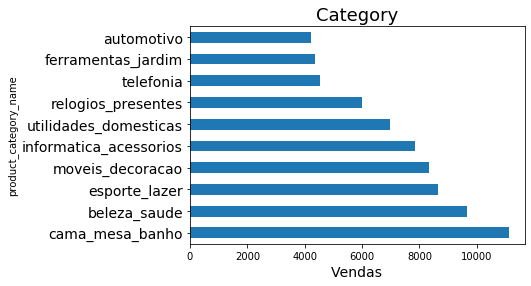

In [28]:
product_orders.groupby(["product_category_name"])["product_id_shorten"].count().sort_values(ascending = False).head(10).plot.barh()
plt.title("Category", fontsize = 18)
plt.xlabel("Vendas", fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Desta forma ficou bem intuitivo e podemos ver que a categiria de "Cama, mesa e banho", juntamente com a "Beleza e saúde", sobressaem das demais.

# Conclusão

Bons insights foram obtidos, como é notório, devido a distância entre alguns estados, o atraso é recorrente.
Em alguns estados mais próximos, existe uma taxa considerável de atrasos, caso houvesse a rota de entrega, poderíamos analisar e obter informações de tráfego, situação da rodovia entre outras informações, para que soluções poudessem ser apresentadas.
Existe uma discrepancia muito grande nos valores dos fretes, no que impacta no lucro final. Uma analise específica será feita para visualizar a diferença total.
Posteriormente será feita uma análise com mapas Geoespaciais, para apronfundarmos na questão dos atrasos.